## Image Processing - scc0251
### Assignment 02 - Image Enhancement and Filtering
### Method 2 - Vignette Filter
Authors: Alexis J. Vargas ,   Karelia A. Vilca



In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

### 1. Functions
#### A) General functions
- ##### Gaussian kernel
Centred at the origin
$$G(x,\sigma) = \frac{1}{2\pi\sigma^2}exp(-\frac{x^2}{2\sigma^2}) $$

In [2]:
def G(x,o):
    return (1/(2*np.pi*np.power(o,2)))*np.exp(-1*(np.power(x,2)/(2*np.power(o,2))))

- ##### Root Mean Squared Error
Rounding to 4 decimal places
$$RSE = \sqrt{\sum_{i}\sum_{j}(m(i,j)-r(i,j))^2} $$

In [3]:
def rsr(img1,img2):
    return ( round (np.sqrt(sum(sum((img1 - img2)**2))),4) )

- ##### Normalization
Scaling the image, using normalization(0 - 255), formula considered in the guideline
$$I = \frac{(I-min(I))*255}{max(I)} $$

In [4]:
def normalization(img):
    #return (((img-np.min(img))*255)/(np.max(img))) #past normalization
    return ((img-np.min(img))/(np.max(img)-np.min(img)))*255 #real normalization

#### B) Method 3 - Vignette Filter

In [5]:
def M3_vignette(img,o_r,o_c):
    """Function to perform Vignette Filter
    Arguments:
        img -- input image
        o_r -- row parameter float
        o_c -- col parameter float
    """   
    r,c = img.shape
    # Calculate the central position in rows and columns
    # the even case can be generalized, since ceil will take the upper one if the division is floating in the odd case
    c_r = np.ceil(r/2)-1
    c_c = np.ceil(c/2)-1
    # Fill a 1D kernel,whose size is the number of rows, with consecutive numbers (negatives, 0 and positives centered)
    i = -c_r
    kernel_r = np.zeros(r)
    for a in range(r):
        kernel_r[a]=i
        i=i+1
    # Fill a 1D kernel,whose size is the number of columns, with consecutive numbers (negatives, 0 and positives centered)
    j = -c_c
    kernel_c = np.zeros(c)
    for a in range(c):
        kernel_c[a]=j
        j=j+1
    # Compute gaussian kernels with parameters
    w_row = G(kernel_r,o_r)
    w_col = G(kernel_c,o_c)
    # Transpose kernel_columns and multiply by kernel_rows, result size = input image.
    mul = np.matmul(np.array([w_col]).T,np.array([w_row]))
    # Multiply element by element, the original and resulting image, transpose because of size
    new_img = np.multiply(mul.T,img)
    # Scale using normalization
    new_img = normalization(new_img)
    return(new_img)

### 2. Example - Vignette Filter
#### A) Consider test case number 5
- flower.png
- 3
- 0
- 50.0
- 50.0

Error:  16972.4239


(-0.5, 249.5, 249.5, -0.5)

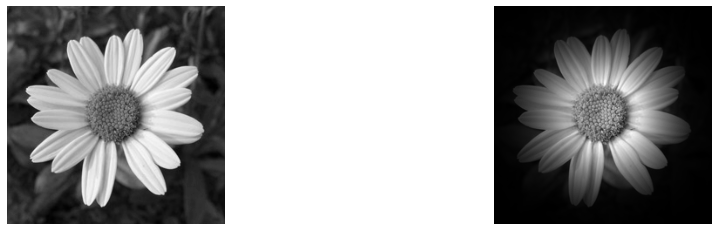

In [6]:
img = imageio.imread('../images/flower.png').astype(np.int32)
o_r = 50.0
o_c = 50.0
output_img = M3_vignette(img,o_r,o_c)
rsr_output = rsr(img, output_img)
print('Error: ',rsr_output)

plt.figure(figsize=(16,4))
plt.subplot(121)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(output_img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

The second picture shows the effect of vignetting, which reduces the image’s brightness towards the image corners, compared to the center.

####  B) Consider test case number 6
- airplane.png
- 3
- 0
- 30
- 45

Error:  20391.1069


(-0.5, 198.5, 170.5, -0.5)

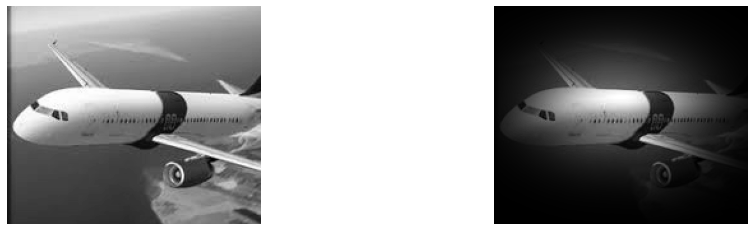

In [9]:
img = imageio.imread('../images/airplane.png').astype(np.int32)
o_r = 30.0
o_c = 45.0
output_img = M3_vignette(img,o_r,o_c)
rsr_output = rsr(img, output_img)
print('Error: ',rsr_output)

plt.figure(figsize=(16,4))
plt.subplot(121)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(output_img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')